# Quad Stationarity Comparison FINAL
## Vertical for paper

These are the stationarity tests from the paper:<br> "*Distortion-guided sequence matching for comparing pipeline inspections*"<br> by Craig L Champlin and Salman Mohagheghi

Submited for publication (10/15/22) in:<br>
**Advances in Engineering Software (ADES)**


Resources:<p>
* https://towardsdatascience.com/detecting-stationarity-in-time-series-data-d29e0a21e638
* https://arch.readthedocs.io/en/latest/

If a series is stationary...
1. there is no trend
2. variance is constant
3. autocorrelation is constant
    

Assumptions:
* Time series are constant interval, 
* welds are *almost* constant interval
* Pipe replacements may screw things up, try w/out replacements?
    

### Autocorrelation
https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.acf.html#statsmodels.tsa.stattools.acf


### ADF
https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html#statsmodels.tsa.stattools.adfuller

https://www.statology.org/dickey-fuller-test-python/


### KPSS
https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.kpss.html#statsmodels.tsa.stattools.kpss
    

(c) October 2022, Craig L Champlin<br>
LICENSE: GNU Affero General Public License v3.0<br>
https://choosealicense.com/licenses/agpl-3.0/    


## Setup and Import Packages

In [38]:
import warnings
warnings.simplefilter("ignore")

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('bmh')
import seaborn as sns
sns.set_style("darkgrid")
plt.rc("figure", figsize=(16, 6))
plt.rc("savefig", dpi=90)
plt.rc("font", family="sans-serif")
plt.rc("font", size=14)


## Import Data

In [39]:
# Import data

rc1s1 = ('./Hybrid_Out/RC1-before.csv')
rc1s3 = ('./Hybrid_Out/RC1-after.csv')

rc2s1 = ('./Hybrid_Out/RC2-before.csv')
rc2s3 = ('./Hybrid_Out/RC2-after.csv')

rc3s1 = ('./Hybrid_Out/RC3-before.csv')
rc3s3 = ('./Hybrid_Out/RC3-after.csv')

rc4s1 = ('./Hybrid_Out/RC4-before.csv')
rc4s3 = ('./Hybrid_Out/RC4-after.csv')


colNames = ['wc','dist','diff1']

dataTypes = {'wc':np.float_, 'dist':np.float_, 'diff1':np.float_}

df1 = pd.read_csv(rc1s1, skiprows=1, header=0, names=colNames)
df2 = pd.read_csv(rc2s1, skiprows=1, header=0, names=colNames)
df3 = pd.read_csv(rc3s1, skiprows=1, header=0, names=colNames)
df4 = pd.read_csv(rc4s1, skiprows=1, header=0, names=colNames)
df5 = pd.read_csv(rc1s3, skiprows=1, header=0, names=colNames)
df6 = pd.read_csv(rc2s3, skiprows=1, header=0, names=colNames)
df7 = pd.read_csv(rc3s3, skiprows=1, header=0, names=colNames)
df8 = pd.read_csv(rc4s3, skiprows=1, header=0, names=colNames)

df1.name = 'RC1'
df2.name = 'RC2'
df3.name = 'RC3'
df4.name = 'RC4'
df5.name = 'RC1'
df6.name = 'RC2'
df7.name = 'RC3'
df8.name = 'RC4'

dfs = [df1, df2, df3, df4, df5, df6, df7, df8]
cols = ['dist', 'diff1']

df1.astype(dataTypes)
df2.astype(dataTypes)
df3.astype(dataTypes)
df4.astype(dataTypes)
df5.astype(dataTypes)
df6.astype(dataTypes)
df7.astype(dataTypes)
df8.astype(dataTypes)

,wc,dist,diff1
0,6.97,-0.38,-0.17
1,8.35,0.43,0.81
2,9.82,0.28,-0.15
3,16.89,-0.42,-0.70
4,18.44,-0.71,-0.29
...,...,...,...
388,13255.03,7.31,-0.16
389,13255.88,7.35,0.04
390,13256.82,7.44,0.09
391,13257.88,7.43,-0.01


## Confirmation Plot

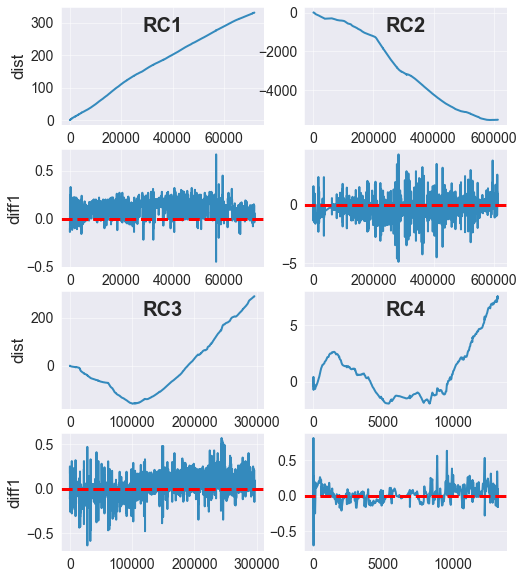

In [40]:
plt.rc("figure", figsize=(8, 10))

fig, axs = plt.subplots(4,2, sharex=False)
i=0;k=0
top=True
for df in dfs[4:8]:
    for col in cols[0:2]: 
        axs[i,k].plot(df.wc, df.loc[:,col])
        
        if i==0 or i==2:
            axs[i,k].set_title(f'{df.name}',fontdict={'fontsize':20, 'fontweight':'bold'}, pad=-25)
            
        if i == 1 or i==3:
            axs[i,k].axhline(0, color='r', linestyle='dashed', linewidth=3)
            
        if k==0:
            axs[i,k].set(ylabel=col)
        
        if i==1 and k==1:
            k=-1; top=False
            
        i+=1
        
    k+=1
    
    if i>1: # reset at graph edge
        if top:
            i=0
        elif i>3:
            i=2

        
fig.show()
# fig.savefig('../../Analysis/Stationarity/Quad diff vert curves 2022 10 07.pdf')
# fig.savefig('../../Analysis/Stationarity/Quad diff vert curves 2022 10 07.png')

## Population Statistics

Mean and variance tell us a lot about the stationarity.  Need a zero mean and constant variance. Also, no trend.

This is often done by splitting the sample into chunks and comparing them.

In [11]:
segs = [0, 0.25, 0.5, 0.75, 1]

for df in dfs[4:8]:
    for col in cols[1:2]:
        print('Dataset : ', df.name, '\t Curve : ', col)   

        for i in range(1,len(segs)):

            x = df.loc[round(len(df.wc)*segs[i-1]):round(len(df.wc)*segs[i]-1),'wc']
            chunk = df.loc[round(len(df.wc)*segs[i-1]):round(len(df.wc)*segs[i]-1), col]

            slope, intercept = np.polyfit(x,chunk,1)
            m = chunk.mean()
            s = chunk.std()
            print(i, ': mean = ', round(m,3), '\t std = ', round(s,1), '\t slope = ', round(slope,3), '\t intercept = ', round(intercept,1))

        print(); print()

    print(); print()


Dataset :  RC1 	 Curve :  diff1
1 : mean =  0.06 	 std =  0.1 	 slope =  0.0 	 intercept =  0.0
2 : mean =  0.077 	 std =  0.1 	 slope =  -0.0 	 intercept =  0.2
3 : mean =  0.105 	 std =  0.1 	 slope =  0.0 	 intercept =  0.0
4 : mean =  0.079 	 std =  0.1 	 slope =  -0.0 	 intercept =  0.3




Dataset :  RC2 	 Curve :  diff1
1 : mean =  -0.282 	 std =  0.3 	 slope =  0.0 	 intercept =  -0.3
2 : mean =  -0.751 	 std =  0.6 	 slope =  -0.0 	 intercept =  -0.0
3 : mean =  -0.588 	 std =  0.4 	 slope =  0.0 	 intercept =  -0.8
4 : mean =  -0.225 	 std =  0.4 	 slope =  0.0 	 intercept =  -1.4




Dataset :  RC3 	 Curve :  diff1
1 : mean =  -0.046 	 std =  0.1 	 slope =  -0.0 	 intercept =  -0.0
2 : mean =  -0.007 	 std =  0.1 	 slope =  0.0 	 intercept =  -0.2
3 : mean =  0.085 	 std =  0.1 	 slope =  0.0 	 intercept =  0.1
4 : mean =  0.102 	 std =  0.1 	 slope =  -0.0 	 intercept =  0.1




Dataset :  RC4 	 Curve :  diff1
1 : mean =  0.008 	 std =  0.2 	 slope =  -0.0 	 intercept =  0.

## Histograms



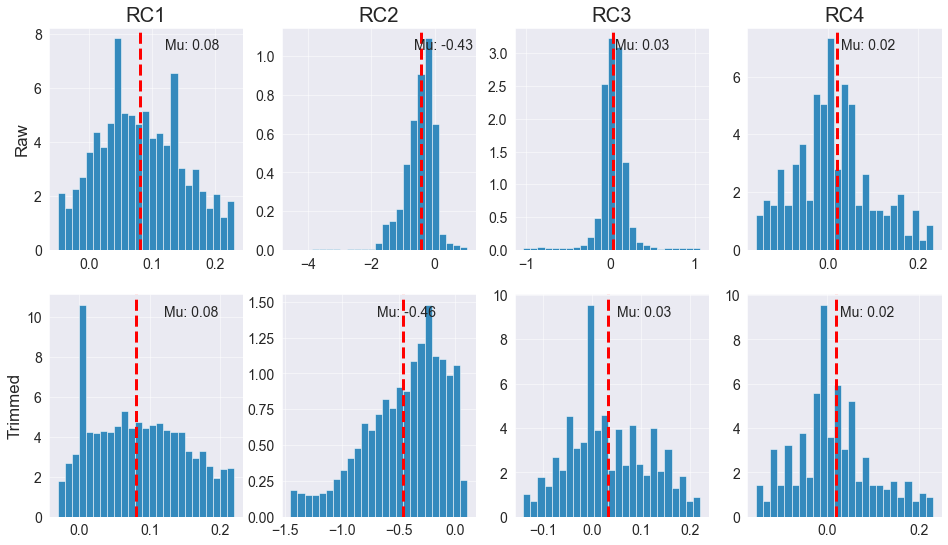

In [12]:
import statistics

numbins = 25
edge = 0.04

plt.rc("figure", figsize=(16, 9))

fig, axs = plt.subplots(2,4, sharex=False)
# fig.suptitle("Histograms", fontsize=30, y=1.0)

i=0
j=0

col = cols[1]

for df in dfs:
    if i==0:
        axs[i,j].set_title(f'{df.name}')
    
        
    mu = df[[col]].mean()[0]
    sigma = df[[col]].std()[0]

    n, bins, patches = axs[i,j].hist(df[[col]],
                                     bins=numbins,
                                     range=(df[[col]].quantile(edge)[0],df[[col]].quantile(1-edge)[0]),
                                     density=True)
    
    # add a 'best fit' line
#     y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
#                np.exp(-0.5 * (1 / sigma * (numbins - mu))**2))
#     axs[i,j].plot(numbins, y, '--')
    
    axs[i,j].axvline(mu, color='r', linestyle='dashed', linewidth=3)
    
    min_ylim, max_ylim = axs[i,j].get_ylim()
    axs[i,j].text(mu + mu*0.5, max_ylim*0.9, 'Mu: {:.2f}'.format(mu))


    if j==0:
        if i==0:
            axs[i,j].set(ylabel="Raw")
        else:
            axs[i,j].set(ylabel="Trimmed")
                
    j += 1
        
    if j > 3:
        j = 0
        i += 1

fig.show()

## QQ Plot

https://matplotlib.org/mpl-probscale/tutorial/getting_started.html

https://matplotlib.org/mpl-probscale/tutorial/closer_look_at_viz.html



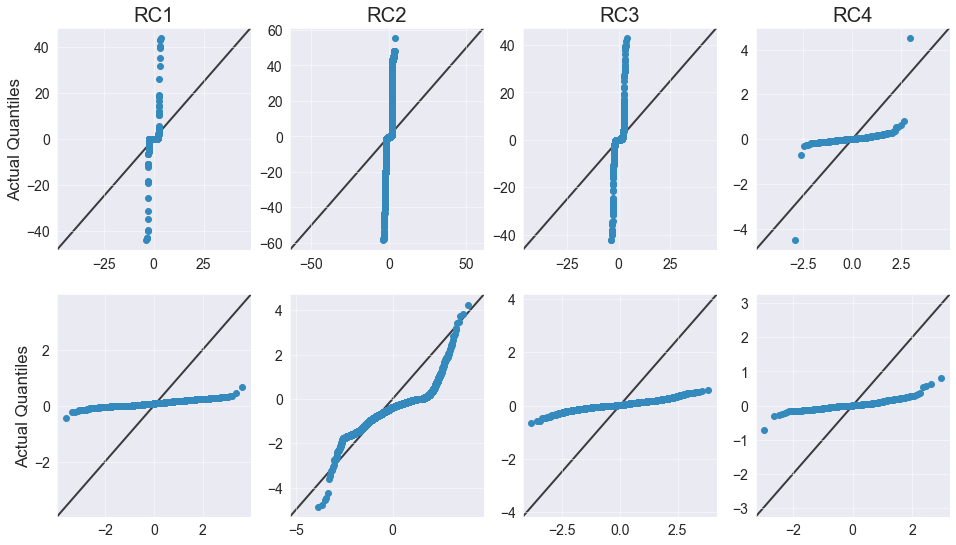

In [13]:
from statsmodels.graphics.gofplots import qqplot
import probscale
from scipy.stats import norm, uniform


def equality_line(ax, label=None):
    limits = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.set_xlim(limits)
    ax.set_ylim(limits)
    ax.plot(limits, limits, 'k-', alpha=0.75, zorder=0, label=label)
    

plt.rc("figure", figsize=(16, 9))

fig, axs = plt.subplots(2,4, sharex=False)
# fig.suptitle("Histograms", fontsize=30, y=1.0)

i=0
j=0

col = cols[1]

for df in dfs:
    if i==0:
        axs[i,j].set_title(f'{df.name}')
    elif i==1:
        axs[i,j].set(xlabel='Standard Quantiles')
    
#     axs[i,j].plot(quantile, df[[col]], fit-True,line="45")
    fig = probscale.probplot(df[[col]], ax = axs[i,j], plottype='qq', probax='x')
    
    equality_line(axs[i,j], label='Normal Dist')

    if j==0:
        if i==0:
            axs[i,j].set(ylabel='Actual Quantiles')
        else:
            axs[i,j].set(ylabel='Actual Quantiles')
                
    j += 1
        
    if j > 3:
        j = 0
        i += 1

fig.show()

## Autocorrelation

Documentation : 
    [https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.acf.html#statsmodels.tsa.stattools.acf]

Parameters:
    
    * x : the 1D time series data (no gaps)
    * nlags : returned value includes lag 0, returns n+1 lags
    * alpha : (scalar) returns confidence intervals, alpha = 0.05 => 95% conf int
    

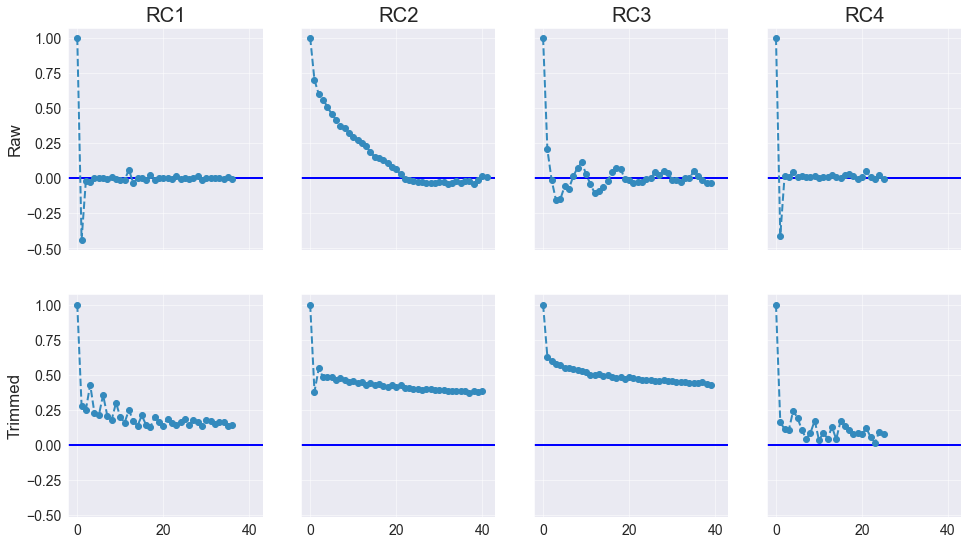

In [14]:
import statsmodels.tsa.stattools as st
plt.rc("figure", figsize=(16, 9))
# plt.suptitle('Autocorrelation')

fig, axs = plt.subplots(2,4, sharex=True, sharey=True)
# fig.tightlayout()
i=0
j=0

col = cols[1]

for df in dfs:
    if i==0:
        axs[i,j].set_title(f'{df.name}')
        
    axs[i,j].axhline(0, color="blue")  
    
    axs[i,j].plot(st.acf(df[[col]], missing='drop'), marker='o', linestyle='--')
    
    if j==0:
        if i==0:
            axs[i,j].set(ylabel="Raw")
        else:
            axs[i,j].set(ylabel="Trimmed")
            
    j += 1
        
    if j > 3:
        j = 0
        i += 1

fig.show()



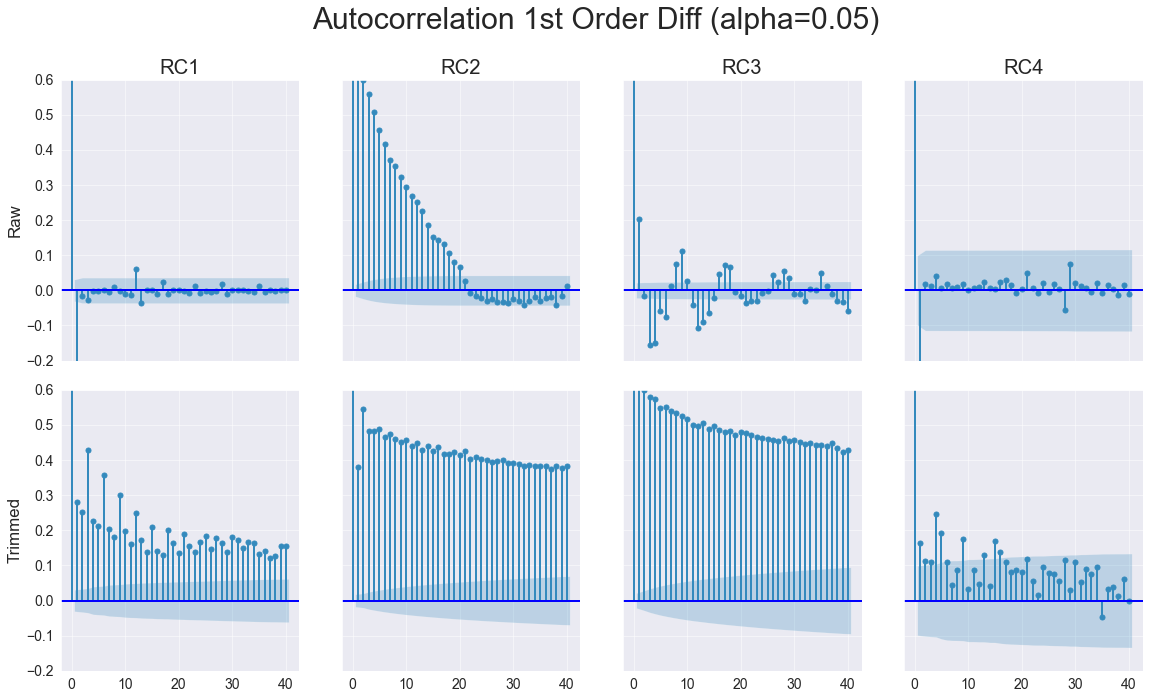

In [15]:
# import statsmodels.tsa.stattools as st
from statsmodels.graphics.tsaplots import plot_acf

plt.rc("figure", figsize=(16, 9))

fig, axs = plt.subplots(2,4, sharex=True, sharey=True)
fig.tight_layout()
fig.suptitle("Autocorrelation 1st Order Diff (alpha=0.05)", fontsize=30, y=1.08)

i=0
j=0

col = cols[1]

for df in dfs:
    if i==0:
        tstr = f'{df.name}'
    else:
        tstr=""
        
    plot_acf(df[[col]], lags=40, alpha=0.05, ax=axs[i,j], title=tstr)
    
    axs[i,j].axhline(0, color="blue")
    axs[i,j].set_ylim([-0.2,0.6])
    
    if j==0:
        if i==0:
            axs[i,j].set(ylabel="Raw")
        else:
            axs[i,j].set(ylabel="Trimmed")
            
    j += 1
        
    if j > 3:
        j = 0
        i += 1

fig.show()


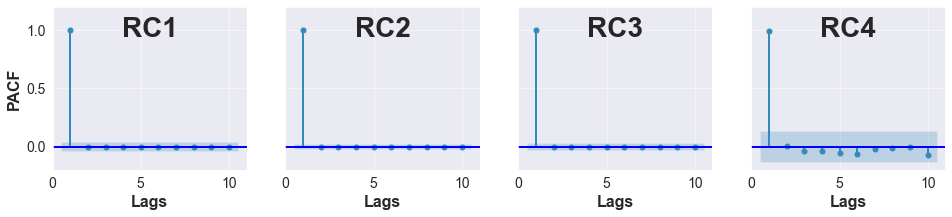

In [16]:
from statsmodels.graphics.tsaplots import plot_pacf

plt.rc("figure", figsize=(16, 3))

fig, axs = plt.subplots(1,4, sharex=True, sharey=True)
# fig.tight_layout()

i=0

col = cols[0]

for df in dfs[4:8]:
    tstr = f'{df.name}'
        
    plot_pacf(df[[col]], lags=10, alpha=0.01, ax=axs[i], zero=False)
    
    axs[i].set_title(tstr, fontdict={'fontsize':28, 'fontweight':'bold'}, pad=-30)
    axs[i].axhline(0, color="blue")
    axs[i].set_ylim([-0.2,1.2])
    
    axs[i].set_xlabel("Lags", fontdict={'fontsize':16, 'fontweight':'bold'})
        
    if i==0:
        axs[i].set_ylabel("PACF", fontdict={'fontsize':16, 'fontweight':'bold'})
            
    i += 1


fig.show() 
# fig.savefig('../../Analysis/Stationarity/Quad PACF Horz 2022 10 09.pdf')
# fig.savefig('../../Analysis/Stationarity/Quad PACF Horz 2022 10 09.png')

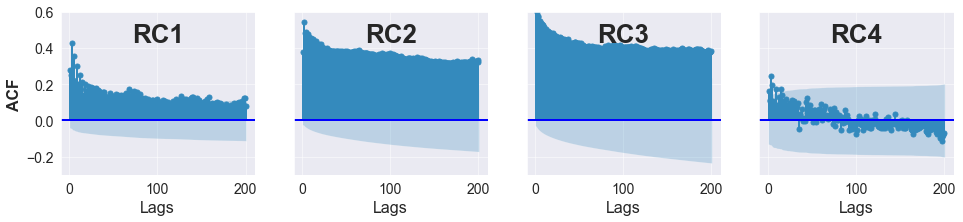

In [17]:
from statsmodels.graphics.tsaplots import plot_acf

plt.rc("figure", figsize=(16, 3))

fig, axs = plt.subplots(1,4, sharex=True, sharey=True)
# fig.tight_layout()

i=0

col = cols[1]

for df in dfs[4:8]:
    tstr = f'{df.name}'
        
    plot_acf(df[[col]], lags=200, alpha=0.01, ax=axs[i], zero=False)
    
    axs[i].set_title(tstr, fontdict={'fontsize':26, 'fontweight':'bold'}, pad=-30)
    axs[i].axhline(0, color="blue")
    axs[i].set_ylim([-0.3,0.6])
    
    axs[i].set_xlabel("Lags", fontdict={'fontsize':16})
        
    if i==0:
        axs[i].set_ylabel("ACF", fontdict={'fontsize':16, 'fontweight':'bold'})
            
    i += 1


fig.show() 
# fig.savefig('../../Analysis/Stationarity/Quad ACF Horiz 2022 10 09.pdf')
# fig.savefig('../../Analysis/Stationarity/Quad ACF Horiz 2022 10 09.png')

## Augmented Dicky-Fuller

Documentation: 
https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html

Parameters:
* x : the data series
* maxlag : Maximum lag which is included in test, default value of 12*(nobs/100)^{1/4} is used when None.
* regression{“c”,”ct”,”ctt”,”n”}
    * “c” : constant only (default).
    * “ct” : constant and trend.
    * “ctt” : constant, and linear and quadratic trend.
    * “nc” : no constant, no trend.

Returns:
* adf : Test statistic
* pvalue :  approximate p-value based on MacKinnon (1994, 2010).
* usedlagint : number of lags used
* nobs : number of observations used
* critical values : Critical values for the test statistic at the 1 %, 5 %, and 10 % levels. Based on MacKinnon (2010). *dictionary*
* icbest : maximized information criterion if autolag is not None.

**Hypotheses**
* $H_0$: The series is not stationary, it is a random walk
* $H_a$: The series is stationary, with no offset and n trend

One-sided test. Reject $H_0$ if $z \le z_{\alpha}$

>Definition: The p-value is the probability we would get the sample we have or something more extreme if the null hypothesis were true.

So, the smaller the P-value, the more evidence there is in the sample data against the null hypothesis and for the alternative hypothesis.


In [48]:
import statsmodels.tsa.stattools as st
from statsmodels.graphics.tsaplots import plot_acf

lags=0

print('Augmented Dickey Fuller')
print('=======================')
print('statsmodels.tsa.stattools')
print('constant only')
print('---------------------')
print('Lags = ', lags)
print()

print('Alpha Values : ', df.name)

ret = st.adfuller(df2[[cols[1]]], maxlag=lags, regression='ct')
a1 = ret[4]['10%']

for key in ret[4]:
    print(key, ' : ', round(ret[4][key],2))

print()
print('If True, z < alphs, so reject null ==> stationary')
print()

for df in dfs[4:8]:
        
    print(df.name)   
    print('CURVE  :    Z \t\t : Z < alpha(10%) :\t P')
    print('----------------------------------------------------')
    
#     for col in cols:

    ret = st.adfuller(df[['diff1']], maxlag=lags, regression='ct')
    print('diff1', ' :  ', round(ret[0],2), '\t : ', ret[0]<a1, '\t : ', round(ret[1],6))
        
    print(); print()
    

Augmented Dickey Fuller
statsmodels.tsa.stattools
constant only
---------------------
Lags =  0

Alpha Values :  RC4
1%  :  -3.96
5%  :  -3.41
10%  :  -3.13

If True, z < alphs, so reject null ==> stationary

RC1
CURVE  :    Z 		 : Z < alpha(10%) :	 P
----------------------------------------------------
diff1  :   -48.5 	 :  True 	 :  0.0


RC2
CURVE  :    Z 		 : Z < alpha(10%) :	 P
----------------------------------------------------
diff1  :   -73.66 	 :  True 	 :  0.0


RC3
CURVE  :    Z 		 : Z < alpha(10%) :	 P
----------------------------------------------------
diff1  :   -56.67 	 :  True 	 :  0.0


RC4
CURVE  :    Z 		 : Z < alpha(10%) :	 P
----------------------------------------------------
diff1  :   -17.25 	 :  True 	 :  0.0




## Augmented DF w/ ARCH Toolbox
References: 
* https://bashtage.github.io/arch/
* https://bashtage.github.io/arch/unitroot/generated/arch.unitroot.ADF.html#arch.unitroot.ADF

**Select Parameters:**
* x: 1D data series
* trend : {“n”, “c”, “ct”, “ctt”}, optional
    * n - no trend components
    * c - include a constanr (default)
    * ct - constant and linear time trend
    * ctt - constant and quadradic time trend
    
**Note:**
This is basically the same as above. Maybe a little easier to use since it uses properties rather than an array.

In [49]:
from arch.unitroot import ADF

lags=0

print('Augmented Dickey Fuller w/ ARCH')
print('=======================')
print('arch.unitroot')
print('no trend components')
print('---------------------')
print('Lags = ', lags)
print()

print('Alpha Values : ')


adf = ADF(df1[[cols[1]]], lags=lags, trend='n')
a1 = adf.critical_values['1%']

for key in adf.critical_values:
    print(key, ' : ', round(adf.critical_values[key],2))

print()
print('If True, z < alphs, so reject null ==> stationary')
print()
    
for df in dfs[0:4]:
        
    print(df.name)    
    print('CURVE  :    Z \t\t : Z < alpha(1%) :      P')
    print('----------------------------------------------------')
    
#     for col in cols:
        
    adf = ADF(df[['diff1']], lags=lags, trend='n')
    print('diff1', ' :  ', round(adf.stat,2), '\t : ', adf.stat<a1, '\t : ', round(adf.pvalue,6))

    print(); print()
    

Augmented Dickey Fuller w/ ARCH
arch.unitroot
no trend components
---------------------
Lags =  0

Alpha Values : 
1%  :  -2.57
5%  :  -1.94
10%  :  -1.62

If True, z < alphs, so reject null ==> stationary

RC1
CURVE  :    Z 		 : Z < alpha(1%) :      P
----------------------------------------------------
diff1  :   -102.12 	 :  True 	 :  0.0


RC2
CURVE  :    Z 		 : Z < alpha(1%) :      P
----------------------------------------------------
diff1  :   -48.1 	 :  True 	 :  0.0


RC3
CURVE  :    Z 		 : Z < alpha(1%) :      P
----------------------------------------------------
diff1  :   -73.13 	 :  True 	 :  0.0


RC4
CURVE  :    Z 		 : Z < alpha(1%) :      P
----------------------------------------------------
diff1  :   -30.36 	 :  True 	 :  0.0




## KPSS Test

The Kwiatkowski, Phillips, Schmidt and Shin (KPSS) stationarity test.

Reference: 
https://bashtage.github.io/arch/unitroot/generated/arch.unitroot.KPSS.html#arch.unitroot.KPSS

Like ADF, the KPSS test is also a unit root test. This one is based around a linear regression, thus the test assumes the series is stationary. The null hypothesis is reversed from ADF.  Null is that the sequence is stationary.  The alternate is that it is stationary.

**Parameters:**
* x : 1D data series
* trend : {“c”, “ct”}, optional
    * c - include a constant
    * ct - include a constant and a linear trend
    
**Hypotheses:**
* $H_0$ : The series is stationary
* $H_a$ : The series is non-stationary

One-sided test. Reject $H_0$ if $z \le z_{\alpha}$
 

In [52]:
from arch.unitroot import KPSS

lags=0

print('KPSS Test from ARCH')
print('=======================')
print('arch.unitroot')
print('constant trend only')
print('---------------------')
print('Lags = ', lags)
print()

print('Alpha Values : ')

kpss = KPSS(df1[[cols[1]]], lags=lags, trend='ct')
a1 = kpss.critical_values['1%']


for key in kpss.critical_values:
    print(key, ' : ', round(kpss.critical_values[key],2))

print()
print('If True, Z<alpha sequence is NOT trend stationary.')
print()

for df in dfs[4:8]:
        
    print(df.name)    
    print('CURVE  :    Z \t\t : Z < alpha(1%) :      P')
    print('----------------------------------------------------')
    
#     for col in cols:
        
#         if (df.name != "RC3" and df.name != "RC4" and df.name != "RC4-After") \
#                     or ((df.name == "RC3" or df.name == "RC4" or df.name == "RC4-After") and col != "diff2"):
            
    kpss = KPSS(df[['diff1']], lags=lags, trend='ct')
    print('diff1', ' :  ', round(kpss.stat,2), ' \t : ', kpss.stat<a1, '\t : ', round(kpss.pvalue,6))

    print(); print()
    

KPSS Test from ARCH
arch.unitroot
constant trend only
---------------------
Lags =  0

Alpha Values : 
1%  :  0.22
5%  :  0.15
10%  :  0.12

If True, Z<alpha sequence is NOT trend stationary.

RC1
CURVE  :    Z 		 : Z < alpha(1%) :      P
----------------------------------------------------
diff1  :   4.39  	 :  False 	 :  0.0001


RC2
CURVE  :    Z 		 : Z < alpha(1%) :      P
----------------------------------------------------
diff1  :   65.73  	 :  False 	 :  0.0001


RC3
CURVE  :    Z 		 : Z < alpha(1%) :      P
----------------------------------------------------
diff1  :   10.32  	 :  False 	 :  0.0001


RC4
CURVE  :    Z 		 : Z < alpha(1%) :      P
----------------------------------------------------
diff1  :   0.48  	 :  False 	 :  0.0001




## Zivot-Andrews Test

Allows one structural break in the series.

Reference: <p>
https://bashtage.github.io/arch/unitroot/generated/arch.unitroot.ZivotAndrews.html#arch.unitroot.ZivotAndrews
    
 **Hypotheses**
* $H_0$: The series is not stationary, single structural break
* $H_a$: The series is stationary, with no offset and n trend

One-sided test. Reject $H_0$ if $z \le z_{\alpha}$

In [53]:
from arch.unitroot import ZivotAndrews

lags=0
trends='ct'

print('Zivot Andrews Test from ARCH')
print('=======================')
print('arch.unitroot')
print(f'trend = {trends}')
print('---------------------')
print('Lags = ', lags)
print()

print('Alpha Values : ')

za = ZivotAndrews(df1[[cols[1]]], max_lags=lags, trend=trends)
a1 = za.critical_values['1%']


for key in za.critical_values:
    print(key, ' : ', round(za.critical_values[key],2))

print()

for df in dfs[4:8]:
        
    print(df.name)    
    print('CURVE  :    Z \t\t : Z < alpha(1%) :      P')
    print('----------------------------------------------------')
    
#     for col in cols:
        
    za = ZivotAndrews(df[['diff1']], max_lags=lags, trend=trends)
    print('diff1', ' :  ', round(za.stat,2), ' \t : ', za.stat<a1, '\t : ', round(za.pvalue,6))

    print(); print()


Zivot Andrews Test from ARCH
arch.unitroot
trend = ct
---------------------
Lags =  0

Alpha Values : 
1%  :  -5.58
5%  :  -5.07
10%  :  -4.83

RC1
CURVE  :    Z 		 : Z < alpha(1%) :      P
----------------------------------------------------
diff1  :   -51.09  	 :  True 	 :  1e-05


RC2
CURVE  :    Z 		 : Z < alpha(1%) :      P
----------------------------------------------------
diff1  :   -97.47  	 :  True 	 :  1e-05


RC3
CURVE  :    Z 		 : Z < alpha(1%) :      P
----------------------------------------------------
diff1  :   -60.25  	 :  True 	 :  1e-05


RC4
CURVE  :    Z 		 : Z < alpha(1%) :      P
----------------------------------------------------
diff1  :   -18.4  	 :  True 	 :  0.000627




## Joint Length Histograms

In [31]:
# get a set of joint lengths by subtracting adjacent wheel counts
#del df4 #, df4s # clear mistakes

df1=dfs[4][['wc']].copy()
df1['wc_shift']=dfs[4][['wc']].copy().shift(periods=1, fill_value=0)
df1['Joint_Length']=df1['wc']-df1['wc_shift']
display(df1)

df2=dfs[5][['wc']].copy()
df2['wc_shift']=dfs[5][['wc']].copy().shift(periods=1, fill_value=0)
df2['Joint_Length']=df2['wc']-df2['wc_shift']
display(df2)

df3=dfs[6][['wc']].copy()
df3['wc_shift']=dfs[6][['wc']].copy().shift(periods=1, fill_value=0)
df3['Joint_Length']=df3['wc']-df3['wc_shift']
display(df3)

df4=dfs[7][['wc']].copy()
df4['wc_shift']=dfs[7][['wc']].copy().shift(periods=1, fill_value=0)
df4['Joint_Length']=df4['wc']-df4['wc_shift']
display(df4)

# df4s.rename(columns={'wc':'wc4_shift'})




,wc,wc_shift,Joint_Length
0,0.73,0.00,0.73
1,0.97,0.73,0.24
2,2.37,0.97,1.40
3,5.57,2.37,3.20
4,8.80,5.57,3.23
...,...,...,...
4110,71795.61,71795.59,0.02
4111,71796.37,71795.61,0.76
4112,71796.83,71796.37,0.46
4113,71797.30,71796.83,0.47


,wc,wc_shift,Joint_Length
0,1.10,0.00,1.10
1,1.57,1.10,0.47
2,3.54,1.57,1.97
3,4.13,3.54,0.59
4,4.71,4.13,0.58
...,...,...,...
12002,614265.85,614264.91,0.94
12003,614266.33,614265.85,0.48
12004,614267.39,614266.33,1.06
12005,614268.53,614267.39,1.14


,wc,wc_shift,Joint_Length
0,1.18,0.00,1.18
1,2.02,1.18,0.84
2,2.85,2.02,0.83
3,3.32,2.85,0.47
4,3.79,3.32,0.47
...,...,...,...
8495,296374.23,296373.68,0.55
8496,296374.61,296374.23,0.38
8497,296375.42,296374.61,0.81
8498,296376.27,296375.42,0.85


,wc,wc_shift,Joint_Length
0,6.97,0.00,6.97
1,8.35,6.97,1.38
2,9.82,8.35,1.47
3,16.89,9.82,7.07
4,18.44,16.89,1.55
...,...,...,...
388,13255.03,13254.31,0.72
389,13255.88,13255.03,0.85
390,13256.82,13255.88,0.94
391,13257.88,13256.82,1.06


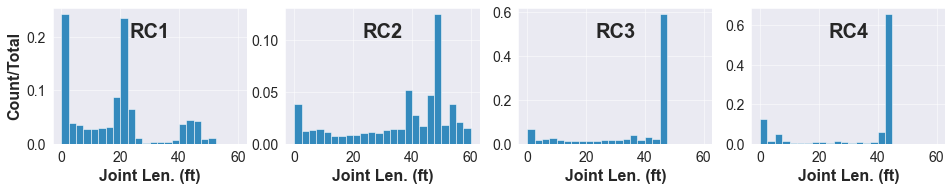

In [33]:
# Joint Lengths - 4x1
import statistics
from matplotlib.ticker import PercentFormatter

numbins = 24
edge = 0.04

plt.rc("figure", figsize=(16, 2.5))
fig, axs = plt.subplots(1,4, sharex=False)

i=0;j=0

axs[0].hist(df1['Joint_Length'],
                     bins=numbins,
                     range=(0,60),
                     weights=np.ones_like(df1['Joint_Length']) / len(df1['Joint_Length']),
                     density=False)
axs[0].set_title('RC1', fontdict={'fontsize':20, 'fontweight':'bold'}, pad=-30)
axs[0].set_ylabel("Count/Total", fontdict={'fontsize':16, 'fontweight':'bold'})
axs[0].set_xlabel("Joint Len. (ft)", fontdict={'fontsize':16, 'fontweight':'bold'})
# axs[0,0].yaxis.set_major_formatter(PercentFormatter(1))

axs[1].hist(df2['Joint_Length'],
                     bins=numbins,
                     range=(0,60),
                     weights=np.ones_like(df2['Joint_Length']) / len(df2['Joint_Length']),
                     density=False)
axs[1].set_title('RC2', fontdict={'fontsize':20, 'fontweight':'bold'}, pad=-30)
axs[1].set_xlabel("Joint Len. (ft)", fontdict={'fontsize':16, 'fontweight':'bold'})

axs[2].hist(df3['Joint_Length'],
                     bins=numbins,
                     range=(0,60),
                     weights=np.ones_like(df3['Joint_Length']) / len(df3['Joint_Length']),
                     density=False)
axs[2].set_title('RC3', fontdict={'fontsize':20, 'fontweight':'bold'}, pad=-30)
axs[2].set_xlabel("Joint Len. (ft)", fontdict={'fontsize':16, 'fontweight':'bold'})

axs[3].hist(df4['Joint_Length'],
                     bins=numbins,
                     range=(0,60),
                     weights=np.ones_like(df4['Joint_Length']) / len(df4['Joint_Length']),
                     density=False)
axs[3].set_title('RC4', fontdict={'fontsize':20, 'fontweight':'bold'}, pad=-30)
axs[3].set_xlabel("Joint Len. (ft)", fontdict={'fontsize':16, 'fontweight':'bold'})
fig.show()

# fig.savefig('../../Analysis/Stationarity/Quad JointLen Horiz 2022 10 09.pdf')
# fig.savefig('../../Analysis/Stationarity/Quad JointLen Horiz 2022 10 09.png')

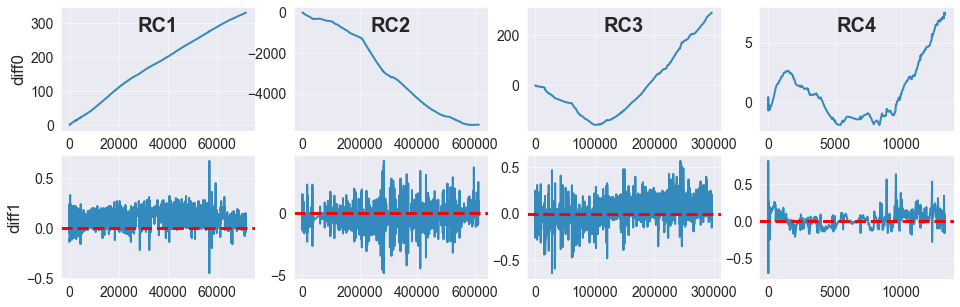

In [4]:
plt.rc("figure", figsize=(16, 5))

fig, axs = plt.subplots(2,4, sharex=False)
i=0
j=0

for df in dfs[4:8]:
    if i==0:
        axs[i,j].set_title(f'{df.name}',fontdict={'fontsize':20, 'fontweight':'bold'}, pad=-25)
    
    for col in cols[0:2]:       
        axs[i,j].plot(df.wc, df.loc[:,col])
        
        if j==0:
            axs[i,j].set(ylabel=col)
            
        if i == 1 :
            axs[i,j].axhline(0, color='r', linestyle='dashed', linewidth=3)
            
        i += 1
        
    i = 0
    j += 1

    if j > 3:
        i=0
        j=0
        
        
fig.show()
# fig.savefig('../../Analysis/Stationarity/Quad diff horz curves 2022 10 09.pdf')
# fig.savefig('../../Analysis/Stationarity/Quad diff horz curves 2022 10 09.png')